In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
sns.set()

In [63]:
X = pd.read_csv('/Users/aryamonani/Desktop/Development/top50.csv',encoding='latin1') #encoding = 'latin1' because the data wouldnot be loaded into the variable otherwise due to decoding issues
X_test_full = pd.read_csv('/Users/aryamonani/Desktop/Development/top50.csv',encoding='latin1')
X.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [64]:
X = X.drop(['Unnamed: 0'],axis=1)
X.describe(include='all')

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50,50,50,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,50,38,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Call You Mine,Ed Sheeran,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,NaN,NaN,NaN,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,NaN,NaN,NaN,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,NaN,NaN,NaN,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,NaN,NaN,NaN,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,NaN,NaN,NaN,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000


In [65]:
y = X.Popularity

In [66]:
X.drop(['Popularity'], axis=1, inplace=True)

In [67]:
X.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000


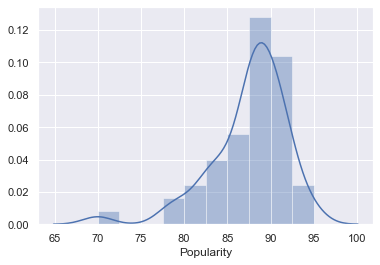

In [68]:
sns.distplot(y)

In [76]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, 
                                                                          random_state = 0)

In [77]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique()<10
                       and X_train_full[cname].dtype=='object']

In [78]:
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [79]:
my_cols = low_cardinality_cols + numeric_cols 
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [80]:
#one hot encoding for categorical data
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [83]:
model_1 = XGBRegressor()
model_1.fit(X_train, y_train)
predictions_1 = model_1.predict(X_valid)
mae_1 = mean_absolute_error(y_valid, predictions_1)
mae_1

[12:57:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


5.679424285888672

In [90]:
model_2 = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
model_2.fit(X_train, y_train)
predictions_2 = model_2.predict(X_valid)
mae_2 = mean_absolute_error(y_valid, predictions_2)
mae_2

[12:59:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


5.597021484375

In [91]:
model_3 = XGBRegressor(n_estimators = 10000, learning_rate = 0.05)
model_3.fit(X_train, y_train)
predictions_3 = model_3.predict(X_valid)
mae_3 = mean_absolute_error(y_valid, predictions_3)
mae_3

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:00:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


5.597021484375

In [92]:
predictions_3

array([83.46379 , 89.5928  , 84.77382 , 88.179665, 91.445145, 87.64381 ,
       86.5958  , 85.9062  , 87.7565  , 81.45275 ], dtype=float32)

In [95]:
output = pd.DataFrame({'Track.Name' : y_valid.index,
                       'Popularity' : predictions_3})
output

,Track.Name,Popularity
0,28,83.463791
1,11,89.592796
2,10,84.773819
3,41,88.179665
4,2,91.445145
5,27,87.643806
6,38,86.595802
7,31,85.906197
8,22,87.756500
9,4,81.452751
